In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# load data từ file csv lên Pandas DataFrame
df = pd.read_csv('/content/heartdata.csv')

age = df['age'];
print(age)

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64


**Mô tả dữ liệu**
+ target: Trạng thái bệnh tim mạch (0 - không mắc bệnh, 1 - mắc bệnh)
+ age: tuổi
+ sex: Giới tính (0 - nữ, 1 - nam)
+ cp: loại đau ngực (0 - không có đau, 1 - có đau thường, 2 - có đau, 3 - không có đau bất thường)
+ trestbps: huyết áp khi nghỉ ngơi
+ chol: mức độ cholesterol huyết tương
+ fbs: lượng đường trong máu (0 - bth <120mg/dl, 1 - cao >=120mg/dl)
+ restecg: kết quả điện tâm đồ lúc nghỉ ngơi (0 - bth, 1 - sự cung cấp máu không đủ đến cơ tim, 2 - phì đại cơ tim ở hố đập thất trái)
+ thalach: Nhịp tim tối đa đạt được 
+ exang: Đau ngực gắng sức (0 - No, 1 - Yes)
+ oldpeak: ST chênh xuống do gắng sức so với nghỉ ngơi
+ slope: độ dốc của đoạn ST tập thể dục đỉnh (0 - dốc lên, 1 - ngang/gần ngang, 2 - dốc xuống)
+ ca: Số mạch máu chính (0-3)
+ thal: là loại bệnh về máu

**Kiểm tra thông tin dataset**

In [ ]:
# in 5 dòng đầu
df.head()

In [ ]:
# in 5 dòng cuối
df.tail()

In [ ]:
# Số hàng, số cột
df.shape

In [ ]:
# Get 1 số thông tin
df.info()

In [ ]:
df.describe()

**Tiền xử lý dữ liệu**

In [ ]:
# Kiểm tra missing data
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Xóa hàng chứa giá trị null
df.dropna();

In [ ]:
#Dữ liệu không đồng nhất
target_valid = [0,1]
target_invalid = df[~df['target'].isin(target_valid)]
print(target_invalid)

**Phân tích định tính dữ liệu**

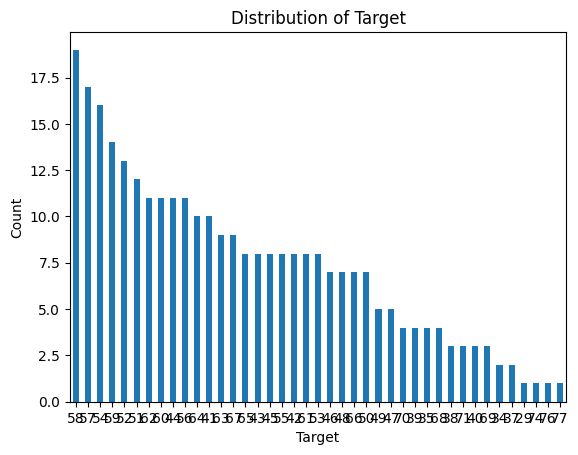

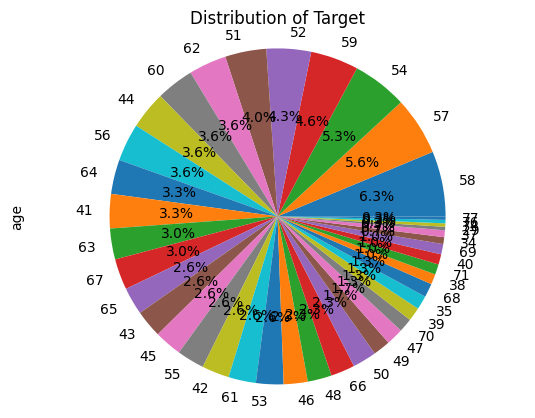

In [ ]:
import matplotlib.pyplot as plt
# Đếm số lượng
target_counts = df['age'].value_counts()

# Trực quan hóa bằng biểu đồ cột
target_counts.plot(kind='bar', rot=0)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')
plt.show()

# Trực quan hóa bằng biểu đồ tròn
target_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Target')
plt.show()

**Phân tích định lượng dữ liệu**

In [ ]:
# Tính toán thống kê
mean_age = df['age'].mean()
var_age = df['age'].var()
min_age = df['age'].min()
max_age = df['age'].max()

# In kết quả thống kê
print("Mean age:", mean_age) #trung bình
print("Variance of age:", var_age) #phương sai
print("Minimum age:", min_age)
print("Maximum age:", max_age)

# Trực quan hóa bằng biểu đồ histogram
plt.hist(df['age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Mối liên quan giữa các đặc tính**

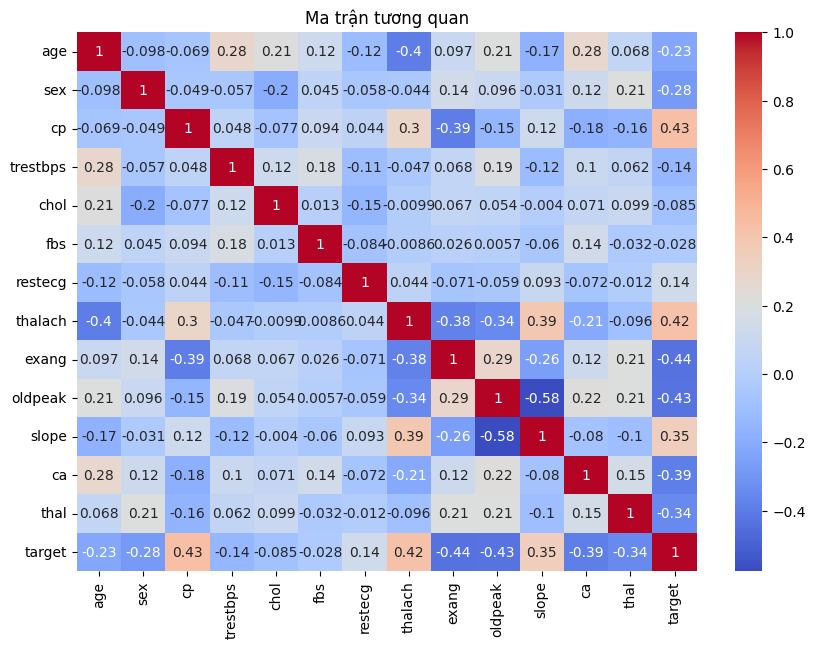

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Trực quan hóa ma trận tương quan bằng biểu đồ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

**Sử dụng các thuật toán học máy để dự đoán dữ liệu & So sánh các thuật toán**

In [ ]:
#Tách features - target
X1 = df.drop(columns='target', axis=1)
X2 = X1.drop(columns='age', axis=1)
X = X2.drop(columns='sex', axis=1)

Y = df['target']

In [ ]:
print(X)

     cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0     3       145   233    1        0      150      0      2.3      0   0   
1     2       130   250    0        1      187      0      3.5      0   0   
2     1       130   204    0        0      172      0      1.4      2   0   
3     1       120   236    0        1      178      0      0.8      2   0   
4     0       120   354    0        1      163      1      0.6      2   0   
..   ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   
298   0       140   241    0        1      123      1      0.2      1   0   
299   3       110   264    0        1      132      0      1.2      1   0   
300   0       144   193    1        1      141      0      3.4      1   2   
301   0       130   131    0        1      115      1      1.2      1   1   
302   1       130   236    0        0      174      0      0.0      1   1   

     thal  
0       1  
1       2  
2       2  
3       2  
4       2  
.. 

In [ ]:
print(Y)

In [ ]:
#Tách data thành data train và data test (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

**1. Sử dụng Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Tạo một đối tượng Logistic Regression
logreg = LogisticRegression()

# Bắt đầu đếm thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình trên tập huấn luyện
logreg.fit(X_train, Y_train)

# Kết thúc đếm thời gian huấn luyện
end_time = time.time()
# Tính thời gian huấn luyện
training_time = end_time - start_time

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
# In kết quả
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))
print("Training time: {:.2f} seconds".format(training_time))

**2. Sử dụng KNeighborsClassifier (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Tạo một đối tượng KNN với số láng giềng K (k_neighbors) được chỉ định
knn = KNeighborsClassifier(n_neighbors=5)

# Bắt đầu đếm thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, Y_train)

# Kết thúc đếm thời gian huấn luyện
end_time = time.time()

# Tính thời gian huấn luyện
training_time = end_time - start_time

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# In kết quả
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))
print("Training time: {:.2f} seconds".format(training_time))


**3. Sử dụng Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Tạo một đối tượng SVM
svm = SVC()

# Bắt đầu đếm thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình trên tập huấn luyện
svm.fit(X_train, Y_train)

# Kết thúc đếm thời gian huấn luyện
end_time = time.time()

# Tính thời gian huấn luyện
training_time = end_time - start_time

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_train_pred = svm.predict(X_train)
Y_test_pred = svm.predict(X_test)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# In kết quả
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))
print("Training time: {:.2f} seconds".format(training_time))


**4. Sử dụng Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Tạo một đối tượng Random Forest với số cây quyết định (n_estimators) được chỉ định
rf = RandomForestClassifier(n_estimators=100)

# Bắt đầu đếm thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, Y_train)

# Kết thúc đếm thời gian huấn luyện
end_time = time.time()

# Tính thời gian huấn luyện
training_time = end_time - start_time

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# In kết quả
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))
print("Training time: {:.2f} seconds".format(training_time))


**Đưa dữ liệu vào 4 mô hình đã train để dự đoán**

In [ ]:
# Dữ liệu mới cần dự đoán
new_data = [[50, 1, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 0, 0]]

# Chạy dự đoán trên mô hình Logistic Regression
logreg_prediction = logreg.predict(new_data)
print("Logistic Regression prediction:", logreg_prediction)

# Chạy dự đoán trên mô hình KNN
knn_prediction = knn.predict(new_data)
print("KNN prediction:", knn_prediction)

# Chạy dự đoán trên mô hình SVM
svm_prediction = svm.predict(new_data)
print("SVM prediction:", svm_prediction)

# Chạy dự đoán trên mô hình Random Forest
rf_prediction = rf.predict(new_data)
print("Random Forest prediction:", rf_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Logistic Regression prediction: [1]
KNN prediction: [1]
SVM prediction: [1]
Random Forest prediction: [0]


**Đưa ra kết luận cho dữ liệu**

Dựa trên các kết quả trên, mô hình Logistic Regression là lựa chọn tốt nhất cho bài toán này. Vì nó có độ chính xác cao trên cả tập huấn luyện và tập kiểm tra, thời gian huấn luyện nhanh và đơn giản hơn so với các mô hình khác. 

**Demo Heart Disease Prediction bằng Logistic Regression trên Website**